Bu projemizde CRISP - DM (Cross Industry Standard Process for Data Mining) metodolojisi temel alınacaktır.

### 1. Business Understanding (İş Problemini Anlamak)

Bir kişinin önceden belirlenmiş olan randevuya gelip gelmeyeceğinin tahmin edilmesi istenmektedir.
Bu problem için, gözetimli öğrenme yöntemlerinden sınıflandırma problemleri için kullanılan LogisticRegression,
DecisionTree, RandomForest, SVM (SupportVectorMachine) vb. modeller kullanılabilir. 

Gözetimsiz öğrenme yöntemlerinden yararlanmak istenirse de,  randevusuna gidecekler ve gitmeyecekler olarak hastaları kümelere ayırma veya segmente etme işlemi gerçekleştirilebilir. Bunun için de makine öğrenmesi modellerinden olan K-Ortalama Kümeleme (K-Mean Clustering) veya Yoğunluk Tabanlı Kümeleme (DBSCAN(density-based clustering non-parametric algorithm)) kullanılabilir.

### 2. Data Understanding(Veri Setini Anlamak)

### 3. Data Preparation(Veriyi Hazırlama)

### 4. Modeling (Modelleme)

### 5. Evaluation(Modeli Değerlendirme)

### 6. Deployment (Dağıtım)



In [2]:
# import libraries
import pandas as pd # data manipulation, load dataset etc.
import numpy as np # linear algebra
import seaborn as sns # data visualization
import matplotlib.pyplot as plt # data visualization

# Preprocessing (Veri Ön İşleme)
from sklearn.preprocessing import StandardScaler # preprocessing

# Modelling (Modelleme için)
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.svm import SVC # Support Vector Machine Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier # Decision Tree Classifier

# train-test split
from sklearn.model_selection import train_test_split

# Model Evaluation (Model Değerlendirme)
# confussion matrix, auc, f1 score etc
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


In [3]:
# 2. Data Understanding

"""
import kagglehub
# Download latest version
path = kagglehub.dataset_download("joniarroba/noshowappointments")
print("Path to dataset files:", path)    
"""
dataset_path = r"D:\10MillionAI\Project\medical_appointment.csv"

medical_appointment = pd.read_csv(dataset_path)

if medical_appointment is None:
    raise FileNotFoundError("File path is not found.")

df = pd.DataFrame(medical_appointment)
# Show first 10 data
df.head(10)

def df_overview(dataframe):
    print("************************** Shape **************************")
    print(dataframe.shape)
    print(f"Total Observation: {dataframe.shape[0]}")
    print(f"Total Number of Features: {dataframe.shape[1]}")
    print("************************** Info **************************")
    print(dataframe.info)
    print("************************** Columns **************************")
    print(dataframe.columns)
    print("************************** Describe **************************")
    print(dataframe.describe())
    

In [4]:
# call the df_overview (Veri setimize genel bakış atalım)
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)
pd.set_option("display.float_format", lambda x: '%.3f' % x)
pd.set_option("display.width", 500)



df_overview(dataframe=df)

************************** Shape **************************
(110527, 14)
Total Observation: 110527
Total Number of Features: 14
************************** Info **************************
<bound method DataFrame.info of                  PatientId  AppointmentID Gender          ScheduledDay        AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  Diabetes  Alcoholism  Handcap  SMS_received No-show
0       29872499824296.000        5642903      F  2016-04-29T18:38:08Z  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1         0           0        0             0      No
1      558997776694438.000        5642503      M  2016-04-29T16:08:27Z  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0         0           0        0             0      No
2        4262962299951.000        5642549      F  2016-04-29T16:19:04Z  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0         0           0        0             0  

In [5]:
# col list comp 
[col for col in df.columns]
""" 
for col in df.columns:
    print(col)
"""
# [df[col].dtype for col in df.column
def show_col_dtype(dataframe):
    for col in dataframe.columns:
        print(col,"'s dtype is: ", dataframe[col].dtype)
    
# call the function
show_col_dtype(dataframe = df)

PatientId 's dtype is:  float64
AppointmentID 's dtype is:  int64
Gender 's dtype is:  object
ScheduledDay 's dtype is:  object
AppointmentDay 's dtype is:  object
Age 's dtype is:  int64
Neighbourhood 's dtype is:  object
Scholarship 's dtype is:  int64
Hipertension 's dtype is:  int64
Diabetes 's dtype is:  int64
Alcoholism 's dtype is:  int64
Handcap 's dtype is:  int64
SMS_received 's dtype is:  int64
No-show 's dtype is:  object


In [6]:

# Categorical Columns
cat_cols = [col for col in df.columns if df[col].dtype == "O"]
# Numerical Columns
num_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]

print("Categorical Columns: ", cat_cols)
print("*"*100)
print("Numerical Columns: ", num_cols)

Categorical Columns:  ['Gender', 'ScheduledDay', 'AppointmentDay', 'Neighbourhood', 'No-show']
****************************************************************************************************
Numerical Columns:  ['PatientId', 'AppointmentID', 'Age', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']


In [7]:
# NA 
df.isnull().sum() 



PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [8]:
# 
na_cols = [col for col in df.columns if df[col].isnull().sum() > 0]
print("NA Columns: ", na_cols) # boş bir liste döndü

# df_copy
df_copy = df.copy()
df_copy = df_copy.set_index("PatientId")
# df_copy = df_copy.drop('PatientId' ,axis= 1)
df_copy.head()

# Bilgi taşımayan sütunları silelim. AppointmentID herhangi bir bilgi taşımıyor.
df_copy = df_copy.drop("AppointmentID", axis= 1)
df_copy.head(10)


NA Columns:  []


,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
PatientId,,,,,,,,,,,,
29872499824296.000,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
558997776694438.000,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
4262962299951.000,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
867951213174.000,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
8841186448183.000,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
95985133231274.000,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
733688164476661.000,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
3449833394123.000,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
56394729949972.000,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No


Kadın oranı: 65.00%
Erkek oranı: 35.00%


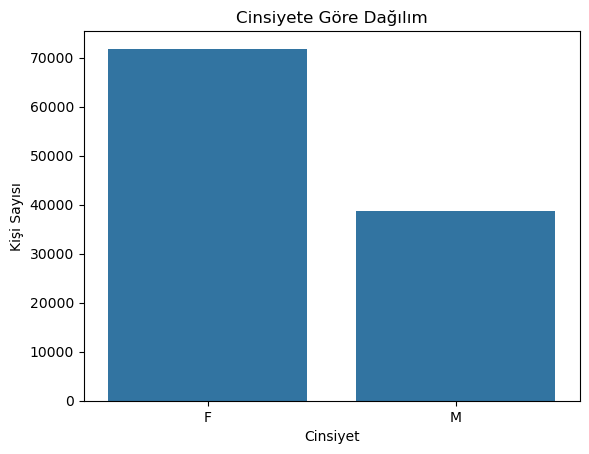

In [ ]:
# Gender 
df_copy["Gender"].value_counts()

f_ratio = (df_copy["Gender"] == "F").mean()  # True = 1, False = 0
print(f"Kadın oranı: {f_ratio:.2%}")


m_ratio = (df_copy["Gender"] == "M").mean()
print(f"Erkek oranı: {m_ratio:.2%}")

#df_copy.groupby("Gender")["Age"].agg(["count", "mean"])

sns.countplot(x = "Gender", data= df_copy)
plt.title("Cinsiyete Göre Dağılım")
plt.xlabel("Cinsiyet")
plt.ylabel("Kişi Sayısı")
plt.show()


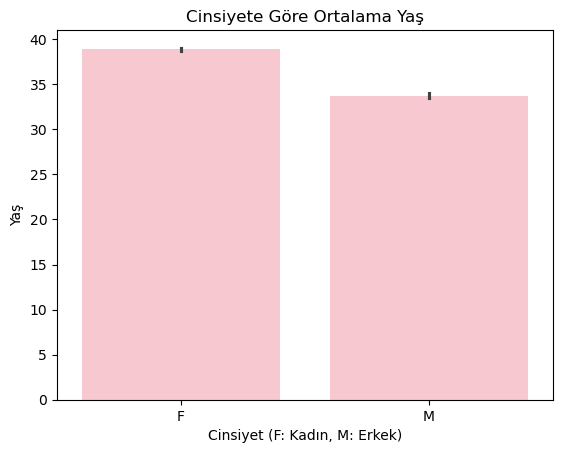

In [33]:
# Age 
mean_age = df_copy["Age"].mean() # 37.08

df_copy.groupby("Gender")["Age"].mean() # F: 38.893987 M: 33.736863

sns.barplot(x = "Gender", y = "Age", data= df_copy, color = "pink")
plt.title("Cinsiyete Göre Ortalama Yaş")
plt.xlabel("Cinsiyet (F: Kadın, M: Erkek)")
plt.ylabel("Yaş")
plt.show()

Hipertansiyonu Olmayanların Oranı: 80.28%
Hipertansiyonu Olanların Oranı:  19.72%


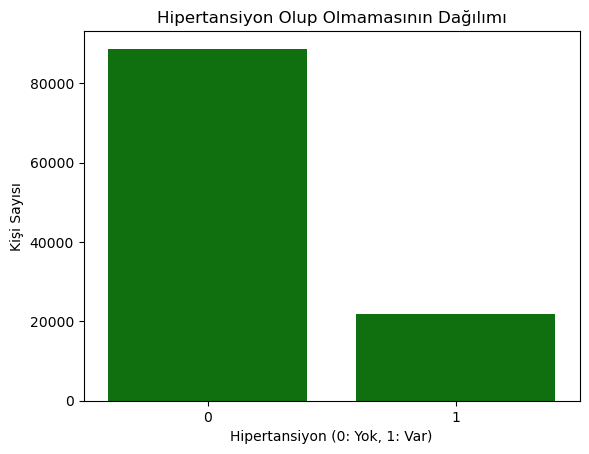

In [32]:
# hipertension
df_copy["Hipertension"].value_counts()  

no_hipertension_ratio = (df_copy["Hipertension"] == 0).sum() / len(df_copy)
print(f"Hipertansiyonu Olmayanların Oranı: {no_hipertension_ratio:.2%}")

yes_hipertension_ratio = (df_copy["Hipertension"] == 1).sum() / len(df_copy)
print(f"Hipertansiyonu Olanların Oranı: {yes_hipertension_ratio: .2%}")



sns.countplot(x = "Hipertension", data= df_copy, color = "green")
plt.title("Hipertansiyon Olup Olmamasının Dağılımı")
plt.xlabel("Hipertansiyon (0: Yok, 1: Var)")
plt.ylabel("Kişi Sayısı")
plt.show()

Diabet Olanların Oranı: 7.19%
Diabet Olmayanların Oranı: 92.81%


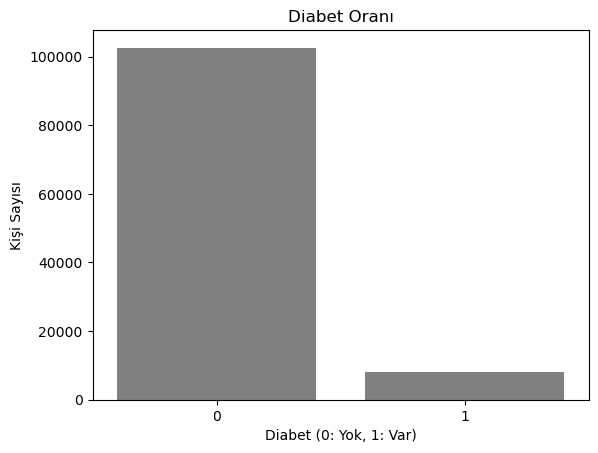

In [35]:
# Diabetes
df_copy["Diabetes"].value_counts()
diabetest_ratio = (df_copy["Diabetes"] == 1).sum() / len(df_copy)
print(f"Diabet Olanların Oranı: {diabetest_ratio:.2%}")

no_diabetes =(df_copy["Diabetes"] == 0).sum() / len(df_copy)
print(f"Diabet Olmayanların Oranı: {no_diabetes:.2%}")

# Alternative way : print(df_copy["Diabetes"].value_counts(normalize= True))

sns.countplot(x = "Diabetes", data = df_copy, color = "gray")
plt.title("Diabet Oranı")
plt.xlabel("Diabet (0: Yok, 1: Var)")
plt.ylabel("Kişi Sayısı")
plt.show()

Alkol Kullanmayan Oranı:  96.96%
Alkol Kullanan Oranı:  3.04%


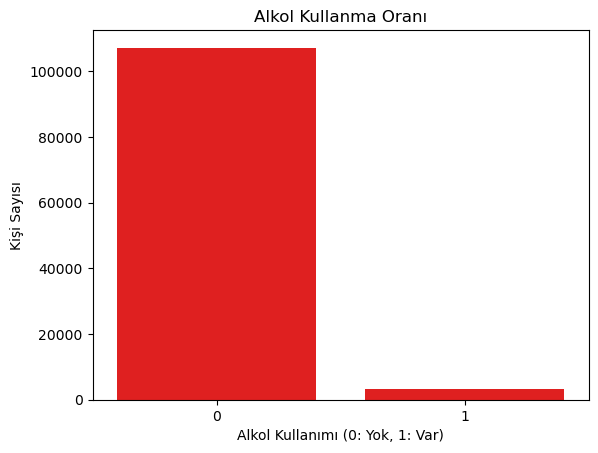

In [47]:
# Alcoholism
df_copy["Alcoholism"].value_counts()

alcoholism_rate = (df_copy["Alcoholism"] == 0).sum() / len(df_copy) 
print(f"Alkol Kullanmayan Oranı: {alcoholism_rate: .2%}")

no_alcoholism_rate = (df_copy["Alcoholism"] == 1).sum() / len(df_copy) 
print(f"Alkol Kullanan Oranı: {no_alcoholism_rate: .2%}")

sns.countplot(x = "Alcoholism", data = df_copy, color = "red")
plt.title("Alkol Kullanma Oranı")
plt.xlabel("Alkol Kullanımı (0: Yok, 1: Var)")
plt.ylabel("Kişi Sayısı")
plt.show()

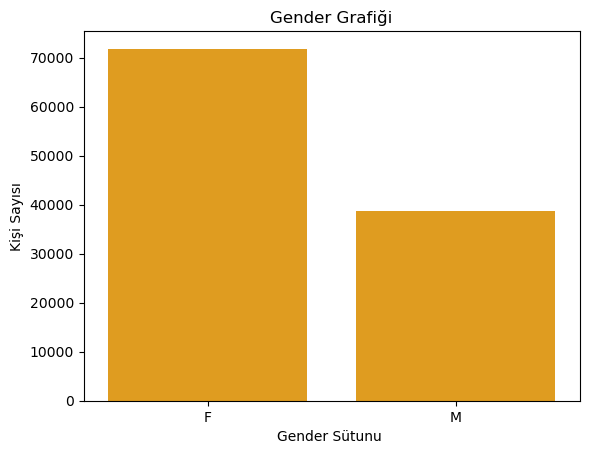

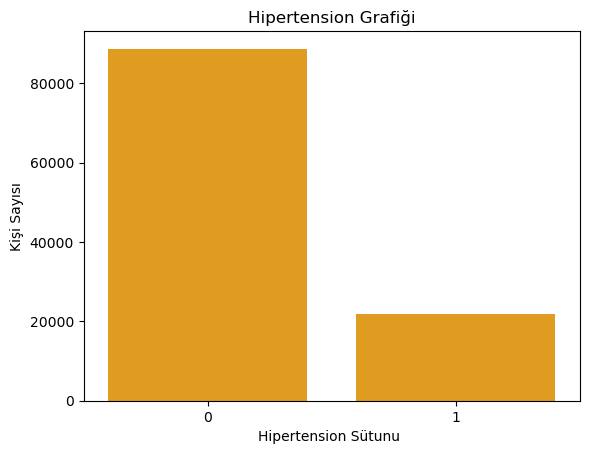

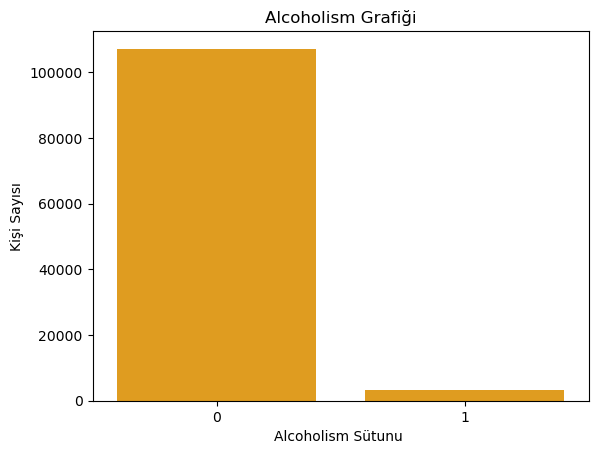

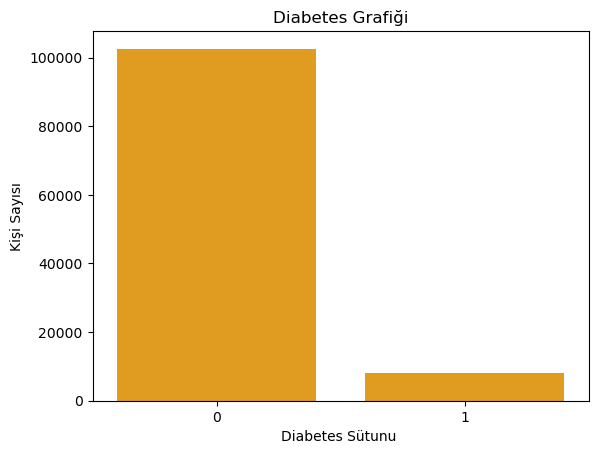

In [55]:
# Bunun için bir sınıf veya döngü de oluşturulabilir.
def show_countplot(dataframe, cat_cols, plot = False):
    for col in cat_cols:
        if plot:
            sns.countplot(x = col, data = dataframe, color = "orange")
            plt.title(f"{col} Grafiği")
            plt.xlabel(f"{col} Sütunu ")
            plt.ylabel("Kişi Sayısı")
            plt.show()

show_countplot(dataframe= df_copy, cat_cols = ["Gender","Hipertension","Alcoholism","Diabetes"], plot = True )

In [ ]:
# Neighbourhood
df_copy["Neighbourhood"].value_counts()

df_copy["Neighbourhood"].nunique() # 81

sorted_neighbourhoods = df_copy["Neighbourhood"].value_counts().sort_values(ascending=False)

print(sorted_neighbourhoods)


Neighbourhood
JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
CENTRO                         3334
TABUAZEIRO                     3132
SANTA MARTHA                   3131
JESUS DE NAZARETH              2853
BONFIM                         2773
SANTO ANTÔNIO                  2746
SANTO ANDRÉ                    2571
CARATOÍRA                      2565
JABOUR                         2509
SÃO PEDRO                      2448
ILHA DO PRÍNCIPE               2266
NOVA PALESTINA                 2264
ANDORINHAS                     2262
DA PENHA                       2217
ROMÃO                          2215
GURIGICA                       2018
SÃO JOSÉ                       1977
BELA VISTA                     1907
MARUÍPE                        1902
FORTE SÃO JOÃO                 1889
ILHA DE SANTA MARIA            1885
SÃO CRISTÓVÃO                  1836
REDENÇÃO      

In [ ]:
mean_neighborhoods = int(sorted_neighbourhoods.mean()) # 1364.53 int'e çevirelim
print("Neighborhoods Ortalaması: ", mean_neighborhoods)


Neighborhoods Ortalaması:  1364


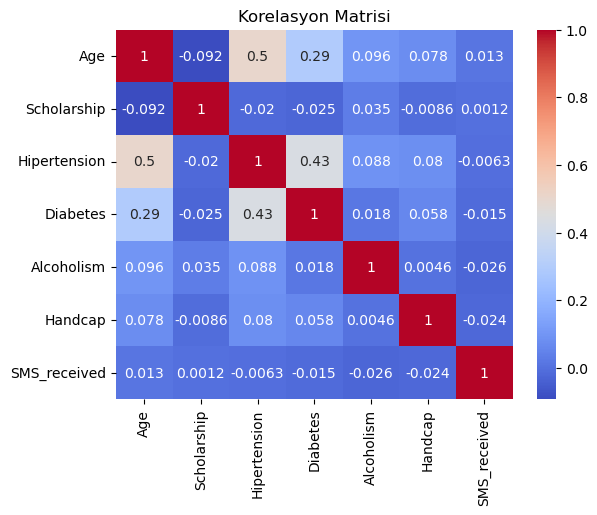

In [52]:
correlation_matrix = df_copy.corr(numeric_only= True)
sns.heatmap(correlation_matrix, annot= True, cmap="coolwarm")
plt.title("Korelasyon Matrisi")
plt.show()

# df_copy[["Age", "Hipertension", "Diabetes", "Scholarship"]].corr()

Yukarıda görünene göre değişkenler arasında çok güçlü bir ilişki yoktur. En çok Age değişkeni ile hipertension değişkeni arasında %50'lik bir pozitif ilişki mevcuttur. Ardından hipertension ile diabetes değişkeni arasında %43'lük pozitif yönlü bir ilişki mevcuttur. Diğer ilişkiler arasında negatif veya pozitif yönlü güçlü bir ilişki bulunmamaktadır.
